# Libraries

In [4]:
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# API Key Generation and API URL Declaration

In [5]:
#API KEY
api_key = "78aac9217e5b16253e383fb61661f079"

#API URL
api_url = "https://api.the-odds-api.com/v4/sports"

#Parameters
params = {"apiKey": api_key}

#Use requests to Query API
response = requests.get(api_url, params=params)

# Connect To API and Display Sports

In [6]:
#Print API Status
if response.status_code == 200:
    sports_list = response.json()
    print("API Connected")
else:
    print("Failed to Connect:", response.status_code)
    sports_list = []

# Prints all available sports and indexes for users to choose from
print("\nAvailable Sports:")
for i, sport in enumerate(sports_list):
    print(f"[{i + 1}] {sport['title']}")

API Connected

Available Sports:
[1] NCAAF
[2] NCAAF Championship Winner
[3] NFL Super Bowl Winner
[4] UFL
[5] AFL
[6] KBO
[7] MLB
[8] MLB World Series Winner
[9] NCAA Baseball
[10] NPB
[11] Basketball Euroleague
[12] NBA
[13] NBA Championship Winner
[14] Boxing
[15] IPL
[16] Pakistan Super League
[17] Test Matches
[18] PGA Championship Winner
[19] The Open Winner
[20] US Open Winner
[21] AHL
[22] Liiga
[23] NHL
[24] NHL Championship Winner
[25] HockeyAllsvenskan
[26] SHL
[27] NCAA Lacrosse
[28] MMA
[29] US Presidential Elections Winner
[30] NRL
[31] Primera División - Argentina
[32] A-League
[33] Austrian Football Bundesliga
[34] Belgium First Div
[35] Brazil Série A
[36] Brazil Série B
[37] Primera División - Chile
[38] Super League - China
[39] Copa Libertadores
[40] Copa Sudamericana
[41] Denmark Superliga
[42] Championship
[43] League 1
[44] League 2
[45] EPL
[46] FA Cup
[47] FIFA World Cup Winner
[48] Veikkausliiga - Finland
[49] Ligue 1 - France
[50] Ligue 2 - France
[51] Bundes

# Sport Selection

In [17]:
selected_sport = int(input("\nEnter the number of the sport you want to analyze: ")) - 1
sport_key = sports_list[selected_sport]['key']
print(f"\nYou selected: {sports_list[selected_sport]['title']}")



Enter the number of the sport you want to analyze: 12

You selected: NBA


# Region and Attributes that We are Analyzing

In [18]:
region = "us"
markets = "spreads,h2h,totals"

# Fetching Data for Spreads, Head to Head, and Totals
### These are the Only Free Metrics from our API

In [19]:
url = f"https://api.the-odds-api.com/v4/sports/{sport_key}/odds"
params = {
    "apiKey": api_key,
    "regions": region,
    "markets": markets,
    "oddsFormat": "american"
}
response = requests.get(url, params=params)
data = response.json()


### Fetching All Market Data Within Data

In [22]:
if isinstance(data, list):
    market_types = {
        market["key"]
        for match in data
        for site in match.get("bookmakers", [])
        for market in site.get("markets", [])
    }
    
    if market_types:
        print("Market Types Found in Data")
        print(sorted(market_types))
    else:
        print("No market types found in the data.")
else:
    print("API Error or unexpected response:")
    print(data)


Market Types Found in Data
['h2h', 'spreads', 'totals']


# Raw Data

In [26]:
print("Raw Data\n",data)

Raw Data
 [{'id': '15bca8e5b08f7b8602a8e3967667c740', 'sport_key': 'basketball_nba', 'sport_title': 'NBA', 'commence_time': '2025-04-21T23:30:00Z', 'home_team': 'New York Knicks', 'away_team': 'Detroit Pistons', 'bookmakers': [{'key': 'draftkings', 'title': 'DraftKings', 'last_update': '2025-04-21T21:53:03Z', 'markets': [{'key': 'h2h', 'last_update': '2025-04-21T21:53:03Z', 'outcomes': [{'name': 'Detroit Pistons', 'price': 210}, {'name': 'New York Knicks', 'price': -258}]}, {'key': 'spreads', 'last_update': '2025-04-21T21:53:03Z', 'outcomes': [{'name': 'Detroit Pistons', 'price': -108, 'point': 6.5}, {'name': 'New York Knicks', 'price': -112, 'point': -6.5}]}, {'key': 'totals', 'last_update': '2025-04-21T21:53:03Z', 'outcomes': [{'name': 'Over', 'price': -110, 'point': 220.5}, {'name': 'Under', 'price': -110, 'point': 220.5}]}]}, {'key': 'lowvig', 'title': 'LowVig.ag', 'last_update': '2025-04-21T21:53:03Z', 'markets': [{'key': 'h2h', 'last_update': '2025-04-21T21:53:03Z', 'outcomes': [

# Data Cleaning

In [34]:
df_clean = []
for match in data:
    game_time = datetime.fromisoformat(match["commence_time"].replace("Z", "+00:00"))
    home = match["home_team"]
    away = match["away_team"]
    for site in match.get("bookmakers", []):
        book = site["title"]
        for market in site.get("markets", []):
            for outcome in market["outcomes"]:
                attributes = {
                    "time": game_time,
                    "home_team": home,
                    "away_team": away,
                    "matchup": f"{away} @ {home}",
                    "market": market["key"],
                    "sportsbook": book,
                    "team": outcome["name"],
                    "odds": outcome["price"]
                }
                if "point" in outcome:
                    attributes["point"] = outcome["point"]
                df_clean.append(attributes)

# Data Entry Statistics

In [40]:
print("Loaded", len(df_clean), "entries")
final= pd.DataFrame(df_clean)
final.head()

Loaded 396 entries


,time,home_team,away_team,matchup,market,sportsbook,team,odds,point
0,2025-04-21 23:30:00+00:00,New York Knicks,Detroit Pistons,Detroit Pistons @ New York Knicks,h2h,DraftKings,Detroit Pistons,210,NaN
1,2025-04-21 23:30:00+00:00,New York Knicks,Detroit Pistons,Detroit Pistons @ New York Knicks,h2h,DraftKings,New York Knicks,-258,NaN
2,2025-04-21 23:30:00+00:00,New York Knicks,Detroit Pistons,Detroit Pistons @ New York Knicks,spreads,DraftKings,Detroit Pistons,-108,6.5
3,2025-04-21 23:30:00+00:00,New York Knicks,Detroit Pistons,Detroit Pistons @ New York Knicks,spreads,DraftKings,New York Knicks,-112,-6.5
4,2025-04-21 23:30:00+00:00,New York Knicks,Detroit Pistons,Detroit Pistons @ New York Knicks,totals,DraftKings,Over,-110,220.5


# Metric Creation


## Different Metrics We Created
###### 1. Win Score: Weights both the Spread as well as Spread Probability equally to predict a Winner
###### 2. Implied Win Probability: Which team is likely to Win According to the Book

##### Creating a Spread Score

In [47]:
spreads = final[final["market"] == "spreads"].copy()
spreads["spread_score"] = -spreads["point"]

##### Spread Odds of Converting

In [64]:
def converted_odds(odds):
    return 100 / (odds + 100) if odds > 0 else -odds / (-odds + 100)

spreads["prob"] = spreads["odds"].apply(converted_odds)

##### Win Score: Creates a Score that Weights the Spread Score and Spread Odds Equally

In [65]:
spreads["win_score"] = 0.5 * spreads["spread_score"] + 0.5 * spreads["prob"]

##### Win Probability Creation

In [66]:
h2h = final[final['market'] == 'h2h'].copy()
h2h["win_probability"] = h2h["odds"].apply(converted_odds)

##### Visualizing Sportsbook Bias Based on Totals

In [78]:
totals = final[final["market"] == "totals"].copy()
totals["probability"] = totals["odds"].apply(converted_odds)

pivot = totals.pivot_table(index=["matchup", "sportsbook", "point"],
                           columns="team", values="probability").reset_index()

pivot["public_bias"] = pivot.get("Over", np.nan) - pivot.get("Under", np.nan)

bias = pivot.dropna(subset=["public_bias"])


# Visualizations

##### Predicting Winners Based off of Win Score 

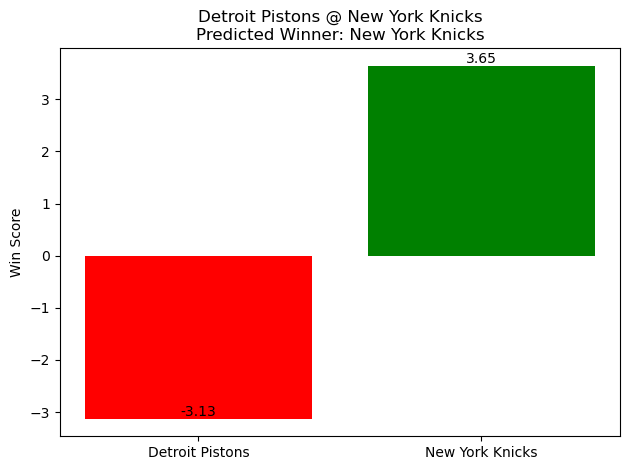

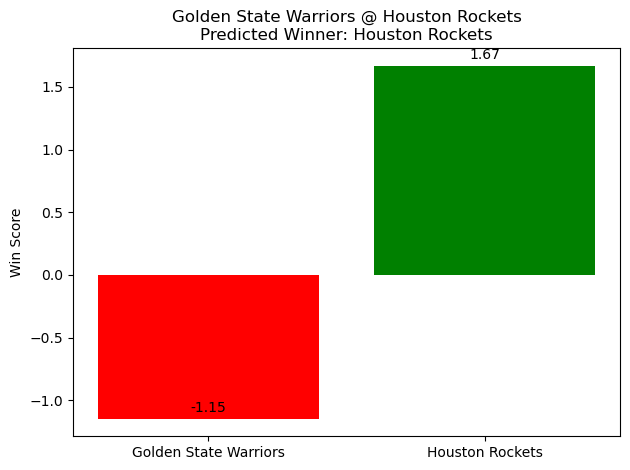

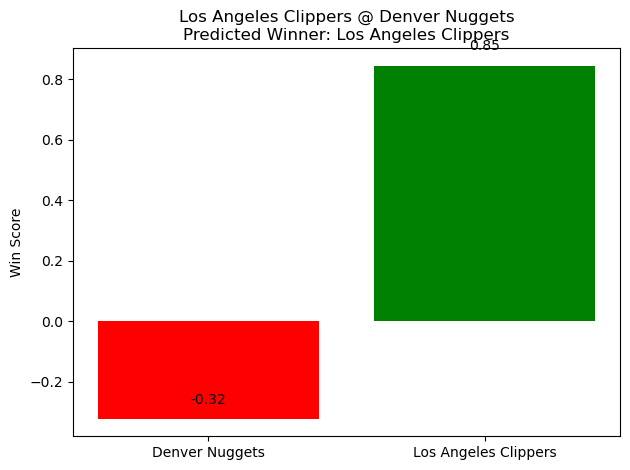

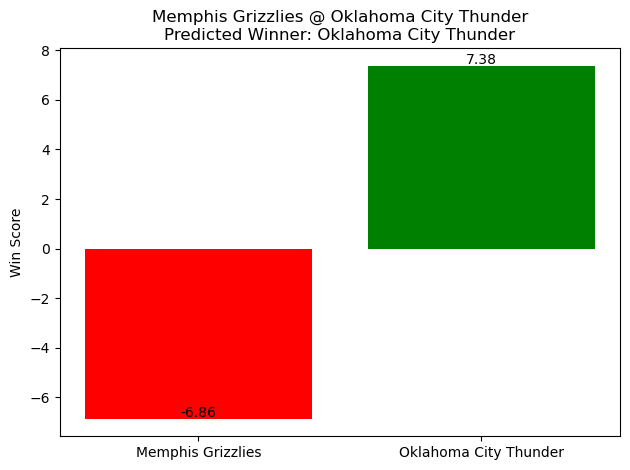

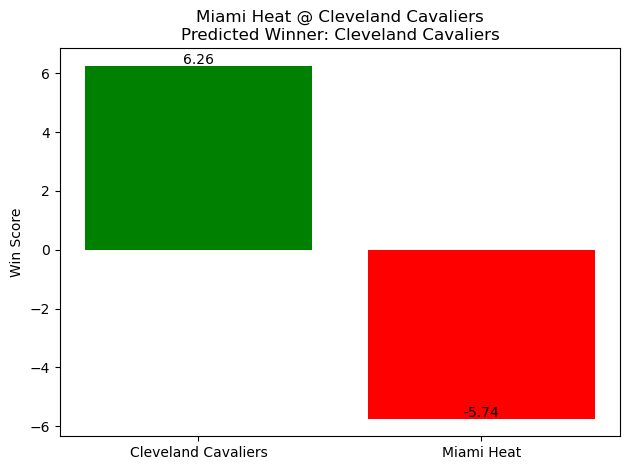

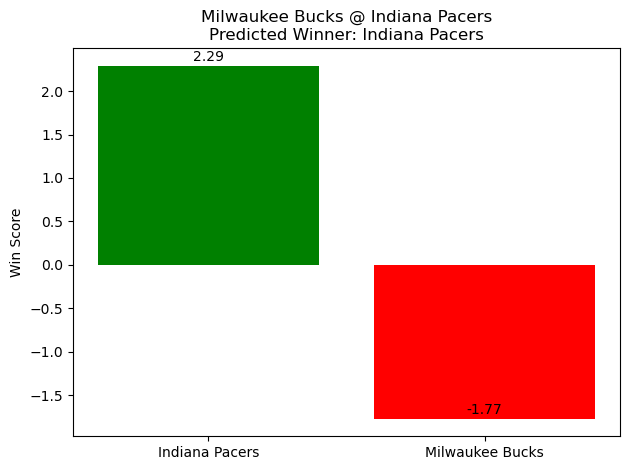

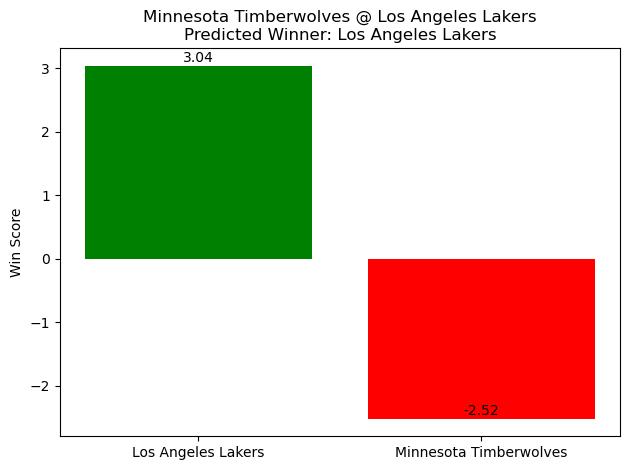

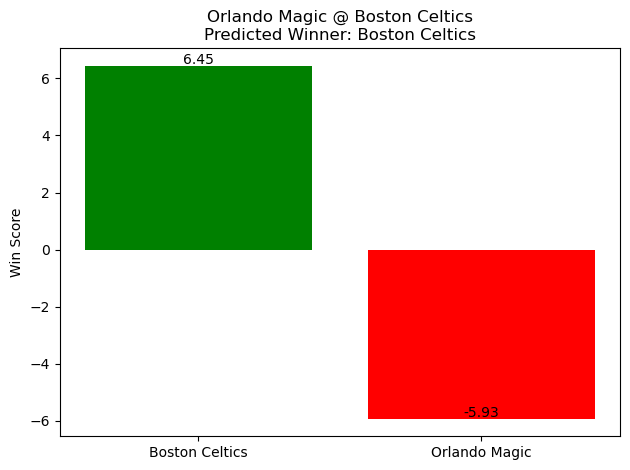

In [51]:

grouped = spreads.groupby(["matchup", "team"]).agg({"win_score": "mean"}).reset_index()

for matchup, metrics in grouped.groupby("matchup"):
    if len(metrics) != 2:
        continue
    teams = metrics["team"].values
    scores = metrics["win_score"].values
    winner = teams[np.argmax(scores)]

    colors = ["red", "red"]
    colors[np.argmax(scores)] = "green"

    x = np.arange(2)
    bars = plt.bar(x, scores, color=colors)
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                 f"{scores[i]:.2f}", ha="center")
    plt.xticks(x, teams)
    plt.title(f"{matchup}\nPredicted Winner: {winner}")
    plt.ylabel("Win Score")
    plt.tight_layout()
    plt.show()


### Predicting Winners based on Win Probability

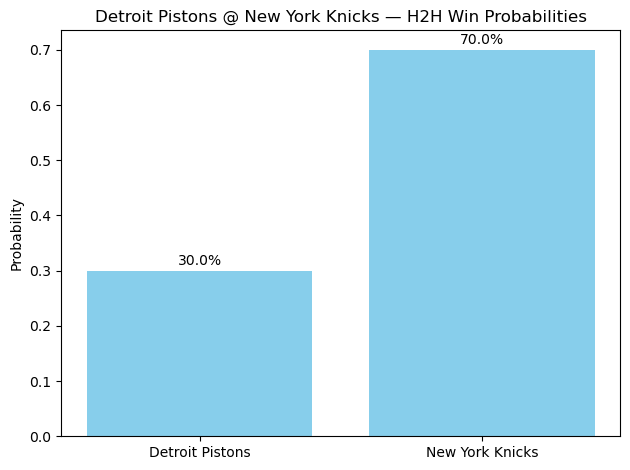

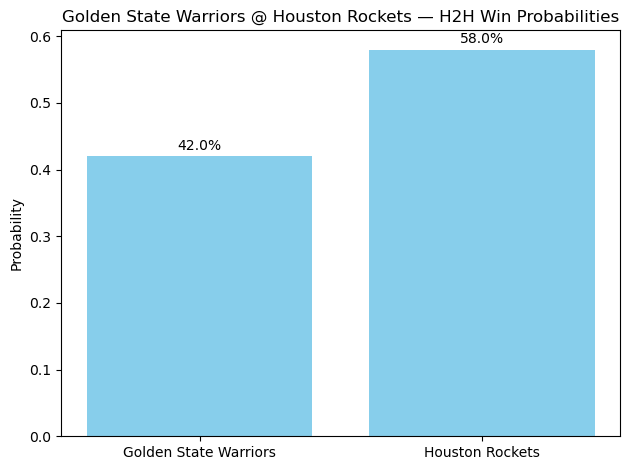

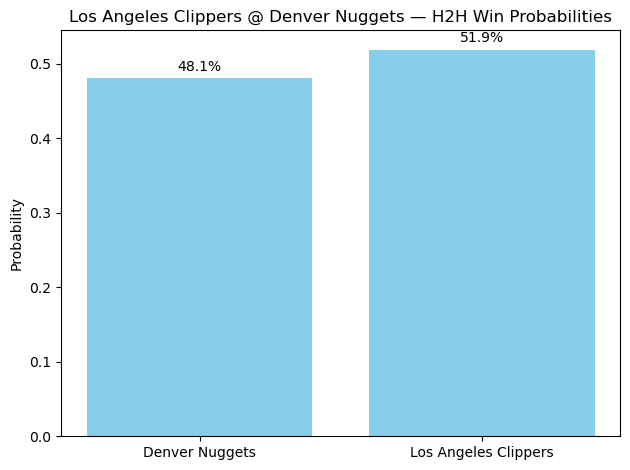

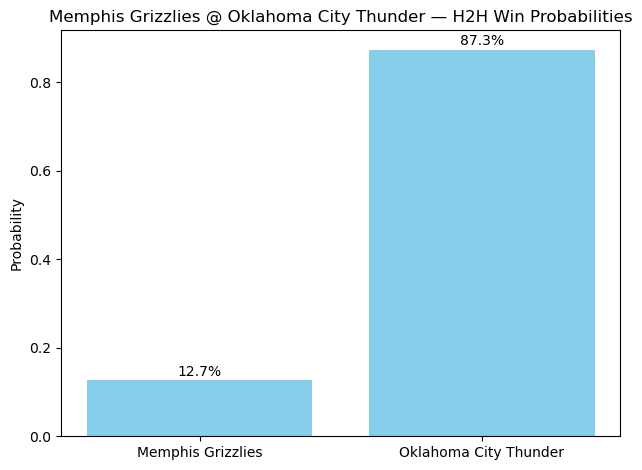

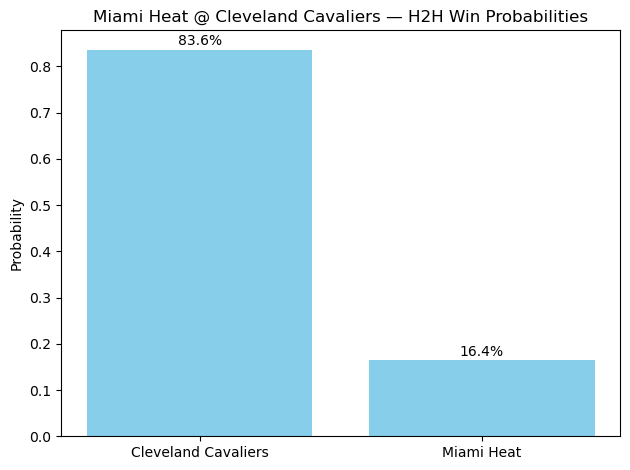

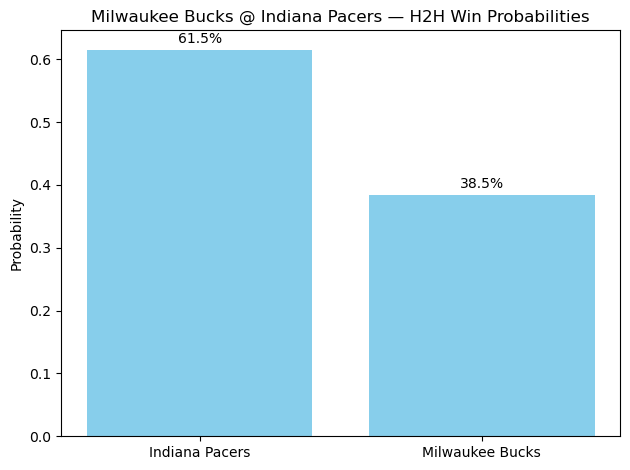

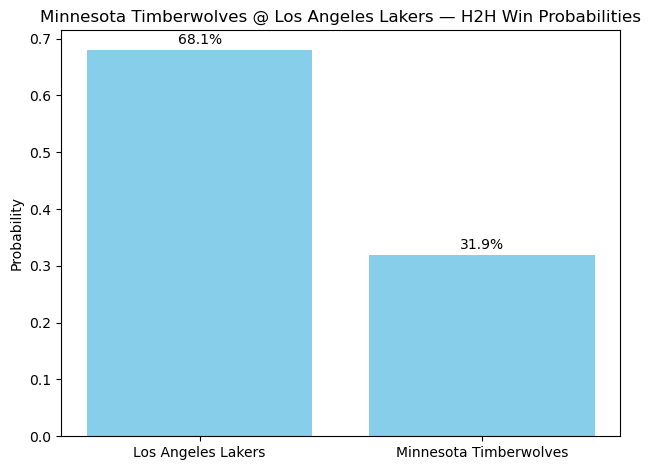

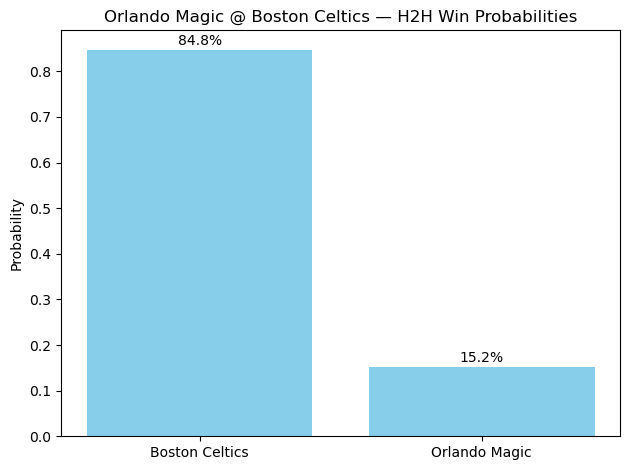

In [59]:
if not h2h.empty:
    h2h_avg = h2h.groupby(["matchup", "team"])["win_probability"].mean().reset_index()
    for matchup, metrics in h2h_avg.groupby("matchup"):
        if len(metrics) != 2:
            continue
        teams = metrics["team"].values
        probs = metrics["win_probability"].values
        probs = probs/ probs.sum()

        x = np.arange(2)
        bars = plt.bar(x, probs, color="skyblue")
        for i, bar in enumerate(bars):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                     f"{probs[i]*100:.1f}%", ha="center")
        plt.xticks(x, teams)
        plt.title(f"{matchup} — H2H Win Probabilities")
        plt.ylabel("Probability")
        plt.tight_layout()
        plt.show()


### Plotting Book Bias

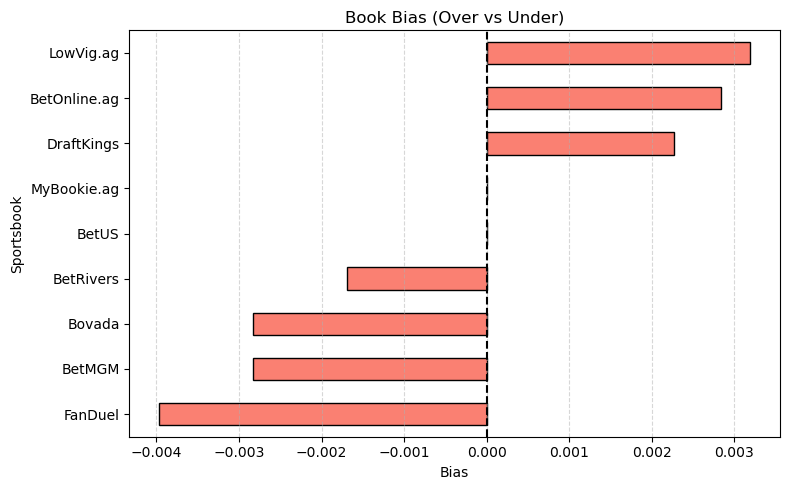

In [79]:
book_bias = bias.groupby("sportsbook")["public_bias"].mean().sort_values()

plt.figure(figsize=(8,5))
book_bias.plot(kind="barh", color="salmon", edgecolor="black")
plt.axvline(0, linestyle="--", color="black")
plt.title("Book Bias (Over vs Under)")
plt.xlabel("Bias")
plt.ylabel("Sportsbook")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()